In [1]:
import numpy as np
import random 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

def loadCSV(filename):
    f = open(filename)
    data = np.loadtxt(f, delimiter=',')
    X = data[:, 1:]
    y = data[:, 0]
    return X, y

X, y = loadCSV("Exercise2/banana.csv")

In [2]:
print("The shape of X is " + str(X.shape))
print("The shape of y is " + str(y.shape))

The shape of X is (5300, 2)
The shape of y is (5300,)


In [3]:
def plot_separated(data, labels):
    conc_array=np.concatenate((data[:,0], data[:,1],labels)).reshape(3,len(data))
    true_array = [row for row in np.transpose(conc_array) if row[2]==1]
    false_array = [row for row in np.transpose(conc_array) if row[2]==-1]
    plt.scatter(column(true_array,0),column(true_array,1), c='b', marker='x', label='1')
    plt.scatter(column(false_array,0), column(false_array,1), c='r', marker='d', label='-1')
    plt.legend(loc='upper left')
    plt.show()

In [4]:
def column(matrix, i):
    return [row[i] for row in matrix]

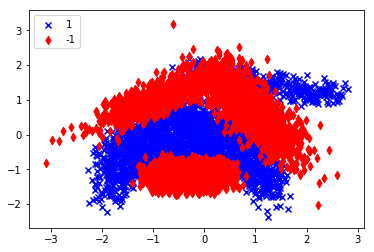

The above graphic displays the banana dataset.


In [5]:
plot_separated(X,y)
print("The above graphic displays the banana dataset.")

In [44]:
neighbor_number=1000
training_len=int(len(y)/2)
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=neighbor_number)
neigh.fit(X[0:training_len,], y[0:training_len])
y_pred=neigh.predict(X[training_len:,])


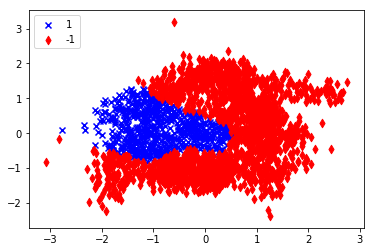

The above graphic displays the estimated labels of the test set.


In [45]:
plot_separated(X[training_len:,],y_pred)
print("The above graphic displays the estimated labels of the test set.")

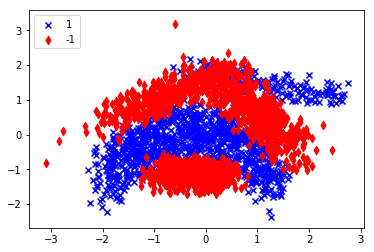

The above graphic displays the true labels of the test set.


In [39]:
plot_separated(X[training_len:,],y[training_len:])
print("The above graphic displays the true labels of the test set.")

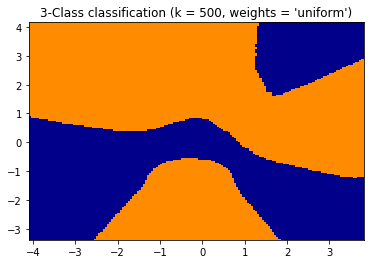

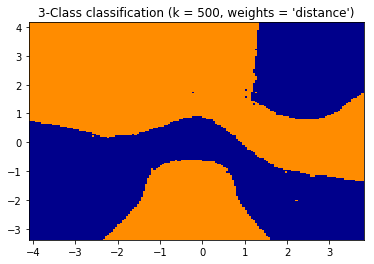

In [49]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors

h = .05  # step size in the mesh
n_neighbors = 500

# Create color maps
cmap_light = ListedColormap(['darkorange', 'darkblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [67]:
class neighbor_predictor:

    def __init__(self, data, labels):
        self.data= data
        self.labels= labels
        
    def train(self, method, proportion, param):
        training_len=int(len(self.labels)*proportion/100)
        if(method=='neighbor'):
            self.neigh = KNeighborsClassifier(n_neighbors=param)
            self.neigh.fit(self.data[0:training_len,], self.labels[0:training_len])
            self.proportion=proportion
        elif(method=='random'):
            h=np.zeros((1000,training_len))
            error=np.zeros(1000)
            for i in range(0,1000):
                h[i]=np.random.normal(loc=0.0, scale=1, size=training_len)
                error[i]=sum(abs(np.sign(np.dot(self.data[0:training_len,],h[i]))-self.labels[0:training_len]))/(2*len(y_training))
            best_hypot=np.argmin(error)   
            self.best=best_hypot
            print('This method has yet to be implemented.')
        else:
            print('No valid method inserted!')
            
    def test(self, test_set):
        training_len=int(len(self.labels)*self.proportion/100)
        if(test_set=='all'):
            X_set=self.data
            y_test=self.labels
        if(test_set=='training'):
            X_set=self.data[0:training_len,]
            y_test=self.labels[0:training_len]
        if(test_set=='test'):
            X_set=self.data[training_len:,]
            y_test=self.labels[training_len:] 
        y_pred=self.neigh.predict(X_set)
        self.pred=y_pred
        result=sum(abs(self.pred-y_test))/(2*int(len(y_test)))
        print('The relative error is ' + str(result*100) + '%.')
    
    # We include an explanation:
    
    def explain(self, question):
        if(question=='attributes'):
            print('The attributes for initializing this method are a data set and a corresponding vector of labels.')
        if(question=='methods'):
            print('Two methods are available: "train" and "test". For details use explain(...).')
        if(question=='train'):
            print('Inputs are method (either "neighbor" or "random"), proportion (in % of data used to train)')
            print('and param (number of neighbors or variance vector).')
        if(question=='test'):
            print('Using this method requires prior application of .train(...) (for details see train).')
            print('Single parameter is a string signifying the portion of training data (all, train, test).')
        else:
            print('This method explains the class "neighbor_predictor".')
            print('For further information insert the string "attributes" or "methods".')
            
        

In [68]:
predictor=neighbor_predictor(X,y)

predictor.train('neighbor', 50, 3)


predictor.explain('attributes')

The attributes for initializing this method are a data set and a corresponding vector of labels.
This method explains the class "neighbor_predictor".
For further information insert the string "attributes" or "methods".


In [15]:
1
+1

1